In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy

from scipy import stats

# Statistics Basics

-----

#### 1B. Getting probabilities based on Z-score.

Here we are calculating the probability of getting a value larger than +1-sigma away from the mean, of a standard normal distribution. This is accomplished by integrating from 1-sigma to the right.

In [2]:
x = scipy.special.erfc(1)
print(x)

0.15729920705028516


And here we are calculating the probability of getting a value smaller than +1-sigma away from the mean of a standard normal distribution. This is the opposite of our previous calculation, where we integrate to the left.

In [3]:
y = scipy.special.erf(1)
print(y)

0.8427007929497148


As we can see, the sum of two calculations above adds up to 1, which is to be expected from integrating to get the total probability of all events.

In [4]:
x+y

1.0

#### 1C. Getting Z-score based on probabilities.

Given a probability of 0.5 (which involves all events from the center of the normal distribution to its left), we predictably get a Z-score of 0.

In [5]:
stats.norm.ppf(0.5)

0.0

We know that for a cumulative probability of ~0.84, this corresponds to a distance of +1-sigma away. If we subtract this from 1, we can expect to get a Z-score of roughly -1. This is because we have a probability less than 50 percent, so we know that we will be at a distance of a sigma of negative magnitude.

In [6]:
stats.norm.ppf(1-0.8413)

-0.9998150936147446

Here we demonstrate the cdf (cumulative distribution function) and the ppf (percent point function), and how they are inverses of one another.

In [7]:
stats.norm.ppf(stats.norm.cdf(1))

1.0

#### 2. Exploring other continuous analytic distributions. (Chi-squared)

In [8]:
plt.rcParams["figure.figsize"] = (15,10)

In [9]:
d = stats.chi2.rvs(55, loc = 3.0, scale = .01, size = 100000)

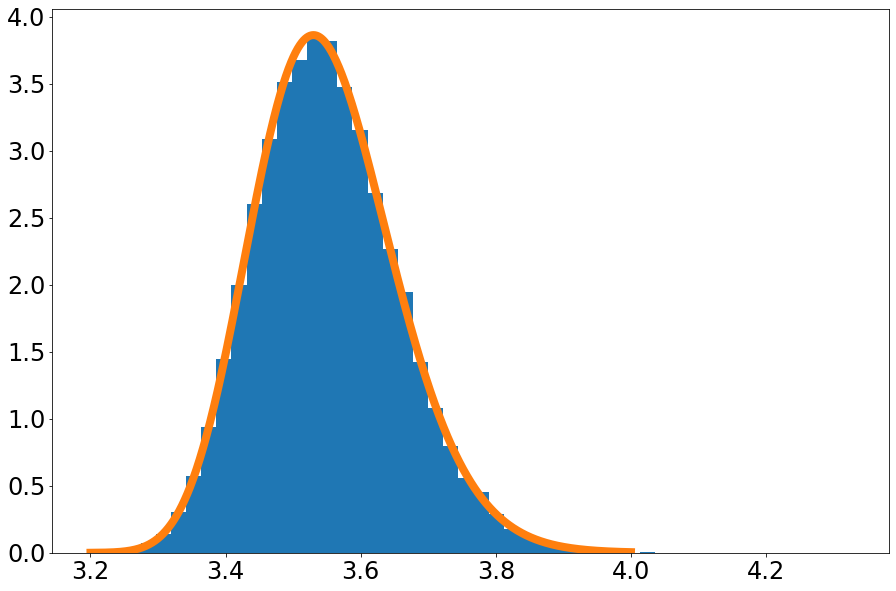

In [10]:
fig, ax = plt.subplots(1, 1)
ax.hist(d,50, density=True)
plt.tick_params(labelsize = 24)
# plt.xlim([2.95,3.05])
x = np.linspace(3.2, 4, 1000)
ax.plot(x,stats.chi2.pdf(x, 55, loc = 3., scale = 0.01),linewidth = 8,alpha = 1)
plt.show()

#### 3A. 
I choose a value of measurement of 3.72.

#### 3B. 
Let's propose a scientific question.

__What is the probability that 3.72 is a measurement of the signal or of a greater signal?__

#### 3C.
$ \LARGE \int_{3.72}^{\infty} \text{pdf}(x)dx $

#### 3D. The following probability calculation.

In [11]:
prob = 1 - stats.chi2.cdf(3.72, 55, loc = 3., scale = 0.01)
print(prob)

0.06167408616234049


#### 3E. The equivalent 'sigma' of our probability calculation, in the context of a normal distribution.

In [12]:
stats.norm.ppf(stats.chi2.cdf(3.72, 55, loc = 3., scale = 0.01))

1.540871052512411

# Non-continuous distributions (Binomial)

https://docs.scipy.org/doc/scipy/reference/reference/generated/scipy.stats.binom.html#scipy.stats.binom

#### 1B.

Here we are going to play with the binomial distribution, which is an example of a discrete, non-continuous distribution. 

There are two parameters that define the shape of a binomial distribution.
Given an random event X, which is defined as either a success or failure, we have to consider two things.

The n number of trials of X.
The p probability of success of X.

The probability mass function of the binomial, then, plots the probability of a given number of successes for each discrete value between 0 and n.

In [29]:
from numpy import random
import matplotlib.pyplot as plt


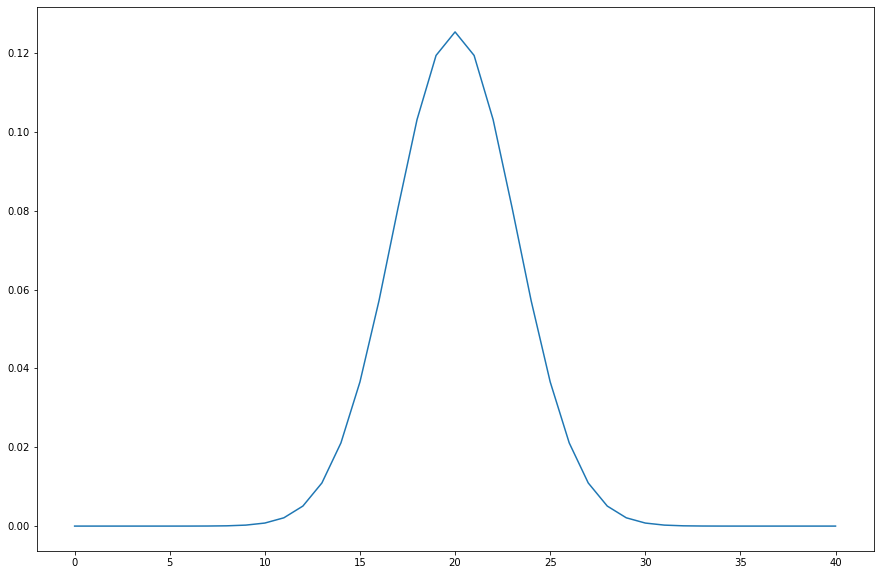

In [27]:
x = np.linspace(0,40,41)
pmf = stats.binom.pmf
plt.plot(x, pmf(x, n = 40, p = 0.5))
plt.show()

Of course, when probability is equal to 0.5, the Binomial distribution looks like a Gaussian. This is expected, as it is the most likely event that half of the independent trials will result in a success. The domain of our distribution is between 0 and n.

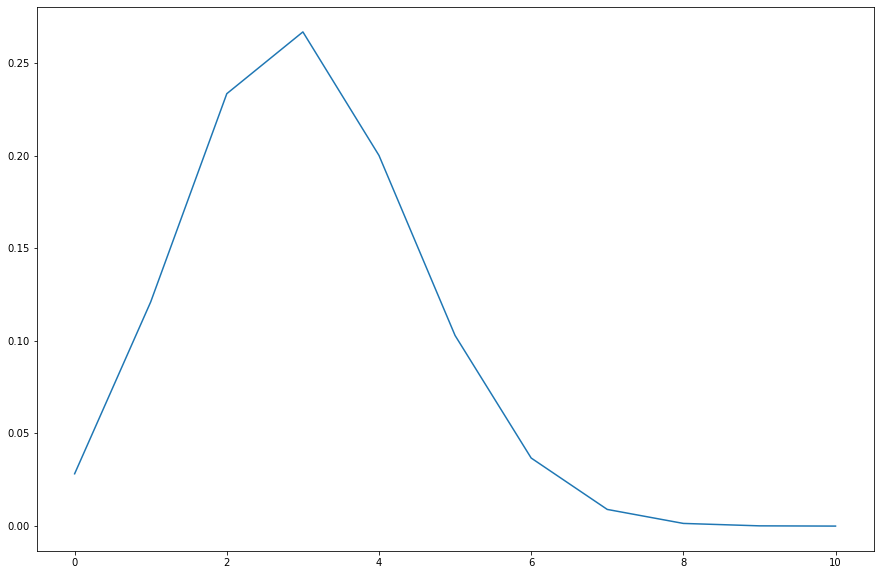

In [30]:
x = np.linspace(0,10,11)
pmf2 = stats.binom.pmf(x,10,0.3)

plt.plot(x,pmf2)
plt.show()

When the probability is away from 0.5, however, we begin to see a skew in the distribution. The peak of the distribution nears the expected value of successful events.

#### 3C.

Let's propose a scientific question.

Using our graph above, with n = 10 and p = 0.3:

__What is the probability of X being successful for 6 trials or more?__ 

We can do what we did similar to calculating the cumulative distribution function (and subtracting from 1 depending on the question you're asking). We just need to make sure to add up all the probabilities of all values within our range, which is 6-10 inclusive.

In [44]:
prob2 = (1 - stats.binom.cdf(k = 5, n = 10, p = 0.3))
print(str(prob2) + ' is the probability of 6 or more successful events of X.')

0.04734898740000004 is the probability of 6 or more successful events of X.


Here we calculated the cumulative distribution function up to and including 5 successes. To get 6 and above, we simply subtract this value from 1.

#### 3D.

Probabilities and sigmas are also discrete in these non-continuous distributions. So compared to continuous probability distributions, instead of thinking in terms of integrals and infinitesimals, we must think of actually summing the probabilities of these discrete values. The biggest catch might be, unlike continuous distributions, we can also calculate the probability at a single value of k.

#### 3E.

Parameters of such distributions are not discrete. For example, the mean does not have to be an integer, and can theoretically span the infinite range of numbers. The mean does not necessarily give a specific value in our domain of probabilities, as it gives us an expected value of successful events. And of course, we know that averaging values out through division does not always give nice numbers. Such statistical parameters that are not subjected to limited operations of addition, subtraction, or even multiplication of the discrete probabilities/sigmas will predictably span outside their discrete domain.